# Decision Tree

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mdaza\AppData\Local\Temp\ipykernel_5992\781345070.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = sns.load_dataset('tips')

In [4]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [6]:
df['sex'] = df['sex'].map({'Male' : 1 , 'Female' : 2})



In [7]:
df['sex'].astype(int)

0      2
1      1
2      1
3      1
4      2
      ..
239    1
240    2
241    1
242    1
243    2
Name: sex, Length: 244, dtype: int32

In [8]:
df['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [9]:
df['smoker'] = df['smoker'].map({'Yes' : 0 , 'No' : 1})

In [10]:
df['smoker'].astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    0
241    0
242    1
243    1
Name: smoker, Length: 244, dtype: int32

In [11]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,2,1,Sun,Dinner,2
1,10.34,1.66,1,1,Sun,Dinner,3
2,21.01,3.50,1,1,Sun,Dinner,3
3,23.68,3.31,1,1,Sun,Dinner,2
4,24.59,3.61,2,1,Sun,Dinner,4


In [12]:
x = df[['total_bill' , "tip" , 'sex']]
x

,total_bill,tip,sex
0,16.99,1.01,2
1,10.34,1.66,1
2,21.01,3.50,1
3,23.68,3.31,1
4,24.59,3.61,2
...,...,...,...
239,29.03,5.92,1
240,27.18,2.00,2
241,22.67,2.00,1
242,17.82,1.75,1


<Axes: xlabel='total_bill', ylabel='tip'>

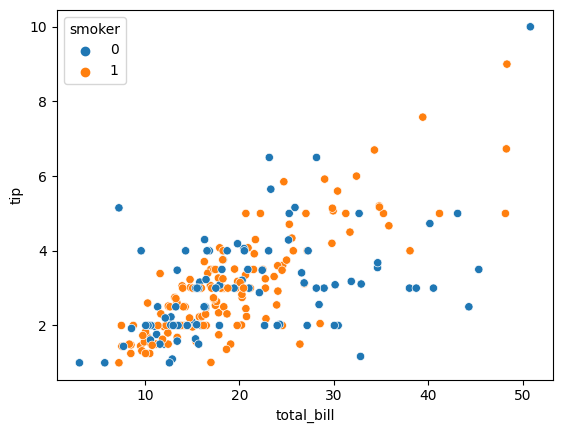

In [13]:
sns.scatterplot(x = 'total_bill' , y= 'tip' , data=df , hue='smoker')

In [14]:
y = df['smoker']
y

0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    0
241    0
242    1
243    1
Name: smoker, Length: 244, dtype: category
Categories (2, int64): [0, 1]

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [16]:
sc.fit(x)

StandardScaler()

In [17]:
x = pd.DataFrame(sc.transform(x) , columns = x.columns)

In [18]:
x.head()

,total_bill,tip,sex
0,-0.314711,-1.439947,1.343353
1,-1.063235,-0.969205,-0.744406
2,0.137780,0.363356,-0.744406
3,0.438315,0.225754,-0.744406
4,0.540745,0.443020,1.343353


In [19]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=20)

In [20]:
# Decision Tree ----------------------------------------------------------

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
dt.score(x_test, y_test)*100

48.97959183673469

In [22]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,2,1,Sun,Dinner,2
1,10.34,1.66,1,1,Sun,Dinner,3
2,21.01,3.50,1,1,Sun,Dinner,3
3,23.68,3.31,1,1,Sun,Dinner,2
4,24.59,3.61,2,1,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,1,Sat,Dinner,3
240,27.18,2.00,2,0,Sat,Dinner,2
241,22.67,2.00,1,0,Sat,Dinner,2
242,17.82,1.75,1,1,Sat,Dinner,2


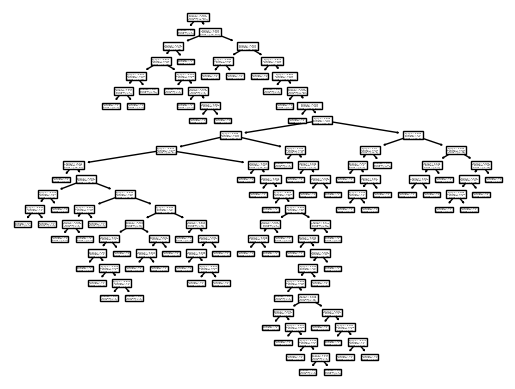

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(dt)
plt.show()

In [24]:
df = sns.load_dataset('tips')

In [25]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [26]:
df.drop(['day' , 'time' , 'size'] , axis = 1 , inplace = True)

In [27]:
df

,total_bill,tip,sex,smoker
0,16.99,1.01,Female,No
1,10.34,1.66,Male,No
2,21.01,3.50,Male,No
3,23.68,3.31,Male,No
4,24.59,3.61,Female,No
...,...,...,...,...
239,29.03,5.92,Male,No
240,27.18,2.00,Female,Yes
241,22.67,2.00,Male,Yes
242,17.82,1.75,Male,No


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df['sex'])
df['sex'] = le.transform(df['sex'])

In [29]:
le.fit(df['smoker'])
df['smoker'] = le.transform(df['smoker'])

In [30]:
df

,total_bill,tip,sex,smoker
0,16.99,1.01,0,0
1,10.34,1.66,1,0
2,21.01,3.50,1,0
3,23.68,3.31,1,0
4,24.59,3.61,0,0
...,...,...,...,...
239,29.03,5.92,1,0
240,27.18,2.00,0,1
241,22.67,2.00,1,1
242,17.82,1.75,1,0


In [31]:
X = df.iloc[:,:-1]
y= df.iloc[:,-1]

X , y

(     total_bill   tip  sex
 0         16.99  1.01    0
 1         10.34  1.66    1
 2         21.01  3.50    1
 3         23.68  3.31    1
 4         24.59  3.61    0
 ..          ...   ...  ...
 239       29.03  5.92    1
 240       27.18  2.00    0
 241       22.67  2.00    1
 242       17.82  1.75    1
 243       18.78  3.00    0
 
 [244 rows x 3 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 239    0
 240    1
 241    1
 242    0
 243    0
 Name: smoker, Length: 244, dtype: int32)

In [32]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.tree import DecisionTreeClassifier

D_tree = DecisionTreeClassifier()

In [34]:

li  = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
    'max_features':['auto','sqrt','log2'],
    'class_weight':['balanced',None],
    
}


from sklearn.model_selection import GridSearchCV

gd = GridSearchCV(D_tree , param_grid=li, cv=5)

gd.fit(X_train,y_train)

c:\Users\mdaza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
660 fits failed out of a total of 1980.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
660 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mdaza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mdaza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\mdaza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\bas

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [35]:
gd.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [41]:
gd.best_score_*100

65.64102564102564

In [37]:
D_tree = DecisionTreeClassifier(class_weight=None , criterion='entropy' , max_depth=3 , max_features='log2' , splitter='best')

D_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2')

In [39]:
D_tree.score(X_train, y_train)*100   ,  D_tree.score(X_test, y_test)*100

(68.71794871794872, 59.183673469387756)

In [43]:
df.head(4)

,total_bill,tip,sex,smoker
0,16.99,1.01,0,0
1,10.34,1.66,1,0
2,21.01,3.50,1,0
3,23.68,3.31,1,0


In [51]:
D_tree.predict([[30.30 , 12.20  , 1]])

c:\Users\mdaza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])